# DS 2500: Data Wrangling<br>Module Assignment 4
March 22, 2022

Student: Alexander Shahramanyan<br>
Instructor: Professor Marina Kogan

## Introduction


For this assignment, I will analyze and visualize book data, and try to extract insights from it. In particular, I will try to find correlations between the variables in the dataset.

## Questions:
**Part I.**
- Which are the most rated books?
- Which are the highest rated books?
- Who are their authors?

**Part II.**
- Which are the most sold books and who are their authors?
- Which author has the most best-selling books?

**Part III.**
- Is there a relationship between the number of pages of a book and its rating?

**Part IV.**
- Are the number of copies sold and average rating of a book correlated?

**Part V.**
- Is there a relationship between the number of pages of a book and its rating among the best-selling books? Among other books?
- Do best-selling books have higher ratings than the other books?

**Part VI.**
- Are the number of ratings and the number of text reviews correlated?
- Do books with low or high rating have more reviews on GoodReads?

## Dataset Description:

**Dataset 1: GoodReads Books**: from GoodReads. Contains data on books, including average rating and number of pages. Different publications of the same book are considered different books.
<br>

Columns:<br>
12 columns
- bookID - int
- title - str
- authors - str
- average_rating - float
- isbn - str
- isbn13 - float
- language_code - str
- num_pages - int
- ratings_count - int
- text_reviews_count - inst
- publication_date - str
- publisher - str

*Number of entries (rows): 11127*
<hr>

**Dataset 2: Best-Selling Books**: from Wikipedia. Contains data on books with more than 10 million copies sold. A book means a piece of work here.
<br>

Columns:<br>
6 columns
- title - str
- author - str
- language - str
- year - int
- copiesSold - str
- genre - str

*Number of entries (rows): 169*

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, pearsonr

# Plotting settings
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'serif'

PALETTE = ['#FF784F', '#00A6A6', '#F39B6D', '#AABD8C', '#3E6990']

Firstly, I load the datasets and check them.

## Dataset I

In [2]:
# Read data
goodreads_df = pd.read_csv("combining-3-goodreads.csv")

In [3]:
# Check dataset shape
goodreads_df.shape

(11127, 12)

In [4]:
# Check the top of the data
goodreads_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
# Check the bottom of the data
goodreads_df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9.780140e+12,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9.780140e+12,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9.788500e+12,spa,272,113,12,5/28/2006,Edimat Libros


In [6]:
# Count null values
goodreads_df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [7]:
# Data description
goodreads_df.describe(include='all')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11127.000000,11127,11127,11127.000000,11127,1.112700e+04,11127,11127.000000,1.112700e+04,11127.000000,11127,11127
unique,NaN,10352,6643,NaN,11127,NaN,27,NaN,NaN,NaN,3679,2292
top,NaN,The Brothers Karamazov,Stephen King,NaN,0439785960,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,NaN,9,40,NaN,1,NaN,8911,NaN,NaN,NaN,56,318
mean,21310.938887,NaN,NaN,3.933631,NaN,9.759888e+12,NaN,336.376921,1.793641e+04,541.854498,NaN,NaN
std,13093.358023,NaN,NaN,0.352445,NaN,4.428964e+11,NaN,241.127305,1.124794e+05,2576.176608,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,10287.000000,NaN,NaN,3.770000,NaN,9.780350e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780590e+12,NaN,299.000000,7.450000e+02,46.000000,NaN,NaN
75%,32104.500000,NaN,NaN,4.135000,NaN,9.780870e+12,NaN,416.000000,4.993500e+03,237.500000,NaN,NaN


In [8]:
goodreads_df.columns = goodreads_df.columns.str.strip()

## Dataset II

In [9]:
# Read data
books_df = pd.read_csv("combining-3-books.csv")

In [10]:
# Check dataset shapes
books_df.shape

(169, 6)

In [11]:
# Check the top of the data
books_df.head()

,title,author,language,year,copiesSold,genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200 million,Historical fiction
1,The Hobbit,J. R. R. Tolkien,English,1937,140.6 million[19],Fantasy
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[17][18],Fantasy
3,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[19],Novella
4,Dream of the Red Chamber,Cao Xueqin,Chinese,1800,100 million[19],Family saga


In [12]:
# Check the bottom of the data
books_df.tail()

,title,author,language,year,copiesSold,genre
164,The Goal,Eliyahu M. Goldratt,English,1984,10 million,NaN
165,Fahrenheit 451,Ray Bradbury,English,1953,10 million,NaN
166,Angela's Ashes,Frank McCourt,English,1996,10 million,NaN
167,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1925,10 million,NaN
168,Bridget Jones's Diary,Helen Fielding,English,1996,10 million (as of 2005),NaN


In [13]:
# Count null values
books_df.isnull().sum()

title          0
author         0
language       0
year           0
copiesSold     0
genre         58
dtype: int64

58/169 books are missing a genre. I don't think I can correctly fill the missing data, so I will probably drop them, when I need to use the genre variable.

In [14]:
# Data description
books_df.describe(include='all')

,title,author,language,year,copiesSold,genre
count,169,169,169,169.000000,169,111
unique,169,153,17,NaN,73,79
top,A Tale of Two Cities,J. K. Rowling,English,NaN,10 million,Fantasy
freq,1,7,127,NaN,26,12
mean,NaN,NaN,NaN,1961.668639,NaN,NaN
std,NaN,NaN,NaN,64.656024,NaN,NaN
min,NaN,NaN,NaN,1304.000000,NaN,NaN
25%,NaN,NaN,NaN,1947.000000,NaN,NaN
50%,NaN,NaN,NaN,1974.000000,NaN,NaN
75%,NaN,NaN,NaN,1994.000000,NaN,NaN


## Part I. Most & Highest Rated Books and Their Authors

For the first part, I will only be using the GoodReads dataset.

Now, I will make a couple of visualizations to find out which are the most rated books and the highest rated book.

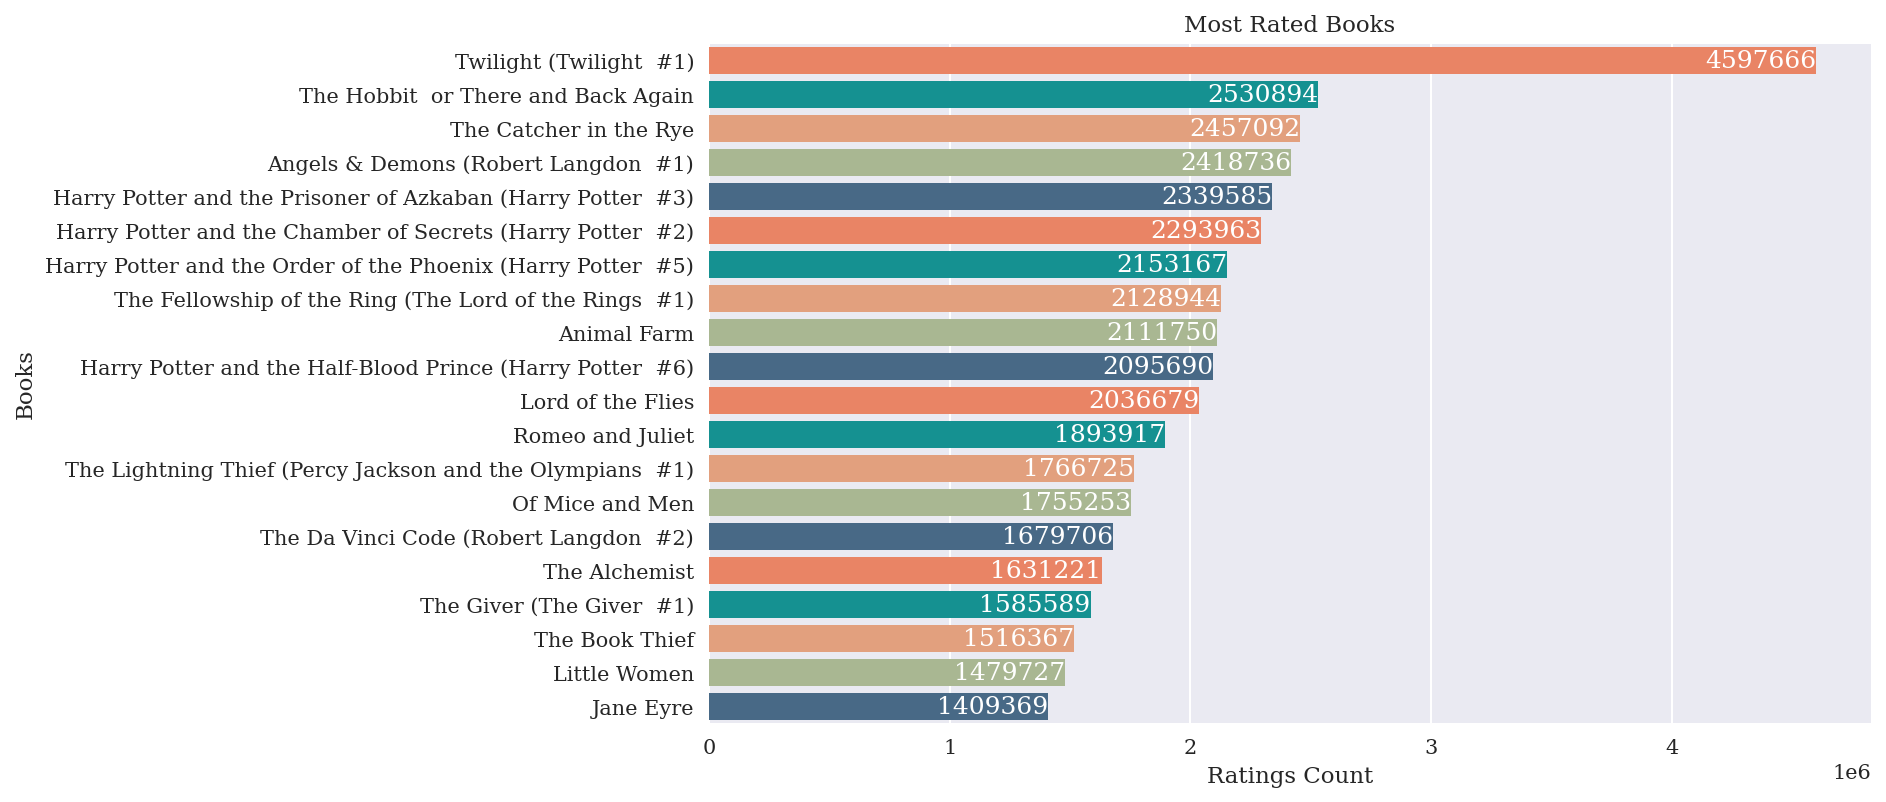

In [15]:
# Most rated books
books = goodreads_df.sort_values('ratings_count', ascending = False)[:20].set_index('title')

# Make a barplot
ax = sns.barplot(x = books['ratings_count'], y = books.index, data=books, palette=PALETTE)

# Add the title and labels
plt.title("Most Rated Books")
plt.xlabel("Ratings Count")
plt.ylabel("Books")

# Add data labels
for (idx, val) in zip(ax.get_yticks(), books.ratings_count):
    plt.text(val, idx, val, fontsize=12, ha="right", va="center", color='white')
    
plt.show()

As can be seen from the barplot, *Twilight* is the most rated and has almost twice as many ratings as the second place which is *The Hobbit*. We can also see that a bunch of *Harry Potter* books are among the most rated.

We've seen the most rated books, but which are the highest rated ones? To find that out, I'll graph another barplot.

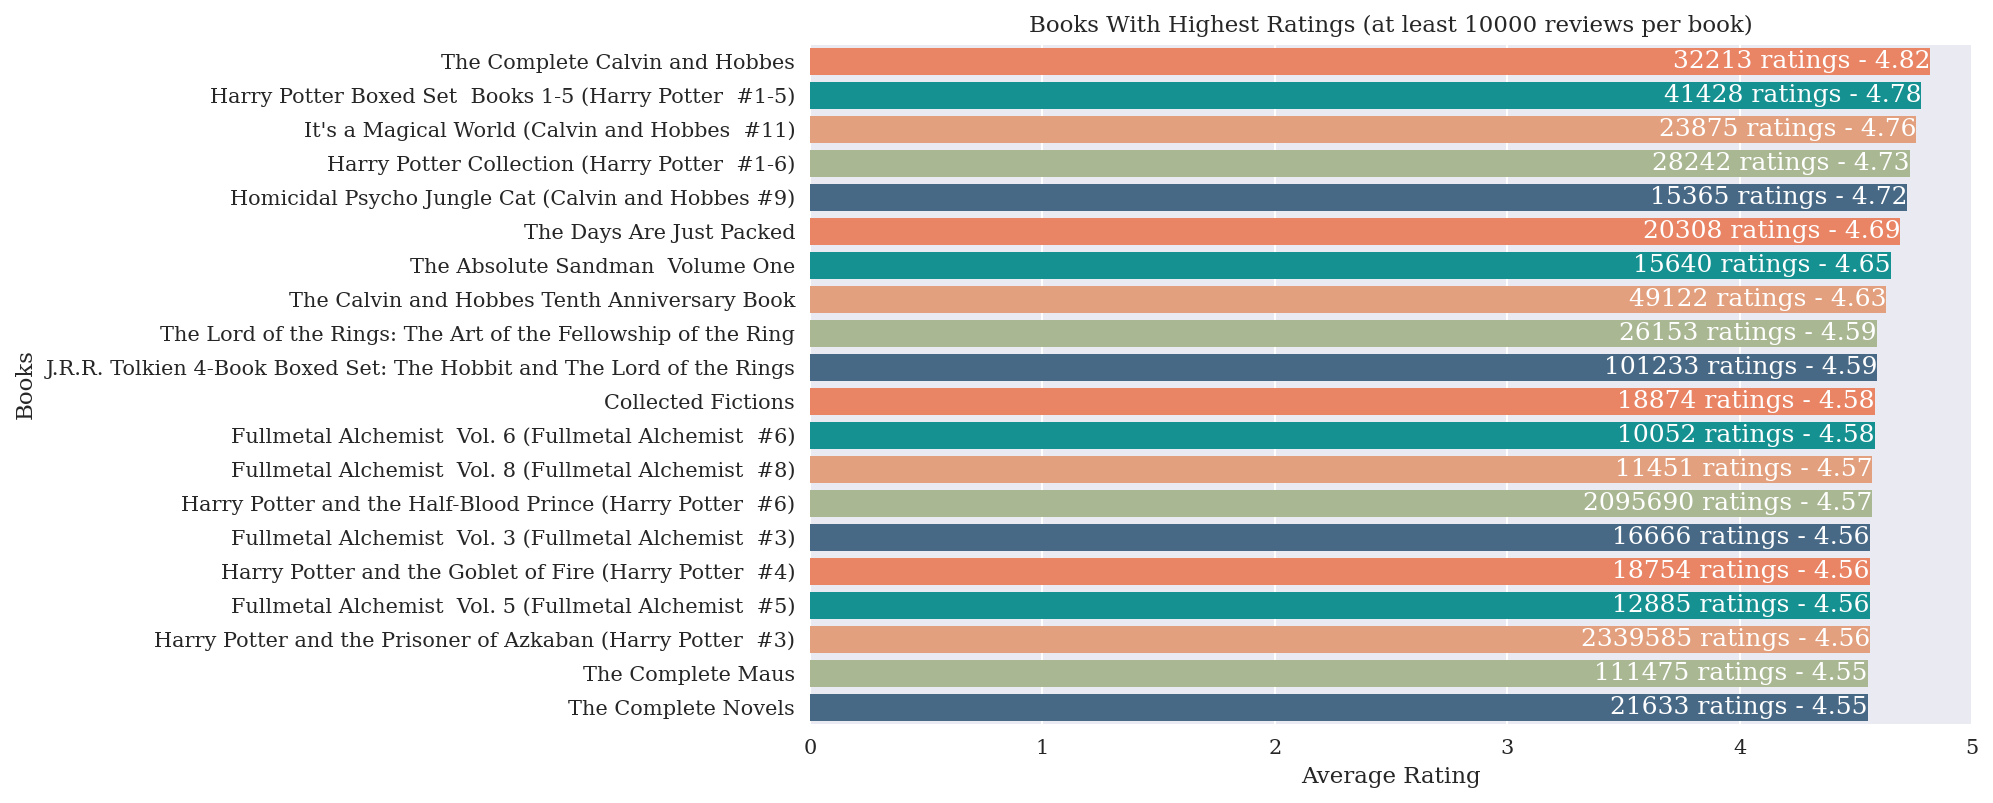

In [16]:
# Books with highest average ratings
books = goodreads_df[goodreads_df['ratings_count'] > 10000].sort_values('average_rating', ascending = False)[:20].set_index('title')

# Make a barplot
ax = sns.barplot(x=books.average_rating, y=books.index, palette=PALETTE)

# Add the title and labels
plt.title("Books With Highest Ratings (at least 10000 reviews per book)")
plt.xlabel("Average Rating")
plt.ylabel("Books")

# Set limit for average rating
plt.xlim([0,5])

# Add data labels
for (idx, val, count) in zip(ax.get_yticks(), books.average_rating, books.ratings_count):
    plt.text(val, idx, f"{count} ratings - {val:.2f}", fontsize=12, ha="right", va="center", color='white')
    
plt.show()

In the plot, I included only the books with at least 10,000 ratings. We can see that the highest rated book is *The Complete Calvin and Hobbes*, which has over 30000 ratings. But we've seen that there are books with significantly more ratings. I'll plot the same barplot, but for books with over 1,000,000 ratings.

In [ ]:
# Books with highest average ratings
books = goodreads_df[goodreads_df['ratings_count'] > 1000000].sort_values('average_rating', ascending = False)[:20].set_index('title')

# Make a barplot
ax = sns.barplot(x=books.average_rating, y=books.index, palette=PALETTE)

# Add the title and labels
plt.title("Books With Highest Ratings (at least 1000000 reviews per book)")
plt.xlabel("Average Rating")
plt.ylabel("Books")

# Set limit for average rating
plt.xlim([0,5])

# Add data labels
for (idx, val, count) in zip(ax.get_yticks(), books.average_rating, books.ratings_count):
    plt.text(val, idx, f"{count} ratings - {val:.2f}", fontsize=12, ha="right", va="center", color='white')
    
plt.show()

The plot changed drastically. The top 4 are *Harry Potter* books. There's also the *Hobbit*, the *Animal Farm*, and *Jane Eyre*, which also appeared in the most rated books plot. Also, while *Twilight* has the most ratings, it doesn't seem to have a high rating.

Next, I will try to find out who the highest rated authors are.

In [ ]:
# Authors with highest average ratings
authors_df = goodreads_df[goodreads_df['ratings_count'] > 10000].drop('authors', axis=1).join(goodreads_df['authors'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).rename('author'))#.agg({'average_rating':'mean'})
authors = authors_df.groupby('author').agg({'average_rating':'mean'}).sort_values('average_rating', ascending=False)[:20]

# Make a barplot
ax = sns.barplot(x=authors.average_rating, y=authors.index, palette=PALETTE)

# Add the title and labels
plt.title("Authors With Highest Average Ratings (counted only books with at least 10000 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Authors")

# Set limit for average rating
plt.xlim([0,5])

# Add data labels
for (idx, val) in zip(ax.get_yticks(), authors.average_rating):
    plt.text(val, idx, f"{val:.2f}", fontsize=12, ha="right", va="center", color='white')
    
plt.show()

Ratings are pretty high. However, I don't seem to know many of these authors. So, I believe, counting only books with at least 1,000,000 ratings can help see who of the more famous authors has higher rating.

In [ ]:
# Authors with highest average ratings
authors_df = goodreads_df[goodreads_df['ratings_count'] > 1000000].drop('authors', axis=1).join(goodreads_df['authors'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).rename('author'))#.agg({'average_rating':'mean'})
authors = authors_df.groupby('author').agg({'average_rating':'mean'}).sort_values('average_rating', ascending=False)[:20]

# Make a barplot
ax = sns.barplot(x=authors.average_rating, y=authors.index, palette=PALETTE)

# Add the title and labels
plt.title("Authors With Highest Average Ratings (counted only books with at least 1000000 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Authors")

# Set limit for average rating
plt.xlim([0,5])

# Add data labels
for (idx, val) in zip(ax.get_yticks(), authors.average_rating):
    plt.text(val, idx, f"{val:.2f}", fontsize=12, ha="right", va="center", color='white')
    
plt.show()

Here we go. The first two places are the Harry Potter authors. *Mary GrandPre* is an illustrator and was mentioned as a co-author in the Harry Potter books. *J.K. Rowling* is the author of the *Harry Potter* books.

## Part II. Most Sold Books & Their Authors

For the second part, I'll be using the Best-selling books dataset from WikiPedia.

I want to see which are the most sold books and who are the authors with most sold books.

Firstly, I'll plot the most sold books. However, I need to convert the `copiesSold` column to numeric before that.

In [ ]:
# Make copiesSold numeric
books_df.at[52,'copiesSold'] = '30 million'
books_df['copiesSold'] = books_df.copiesSold.apply(lambda x: float(x.split(" ")[0])*1000000)

In [ ]:
# Most sold books
books = books_df.sort_values('copiesSold', ascending=False)[:20]

# Make a barplot
ax = sns.barplot(x=books.copiesSold, y=books.title, palette=PALETTE)

# Add the title and labels
plt.title("Most Sold Books")
plt.xlabel("Sold Copies")
plt.ylabel("Books")

# Add data labels
for (idx, val) in zip(ax.get_yticks(), books.copiesSold):
    plt.text(val, idx, f"{val/1000000:.1f}m", fontsize=12, ha="right", va="center", color='white')
    
plt.show()

*A Tale of Two Cities* has been sold significantly more than the others. However, we also see a bunch of *Harry Potter* books in the list, as well as the *Hobbit*. These were among the most and highest rated books in the previous dataset.

Next, I will see who is the author of most sold books. Having seen so many *Harry Potter* books in the previous plot, I assume *J.K.Rowling* will have the most sold books.

In [ ]:
# Authors with most books
authors = books_df.groupby("author").agg({'copiesSold':'sum', 'title':'count'}).rename(columns={'title':'books'}).sort_values(['copiesSold', 'books'], ascending=[False, True]).reset_index()[:20]

# Make a barplot
ax = sns.barplot(x=authors.copiesSold, y=authors.author, palette=PALETTE)

# Add the title and labels
plt.title("Authors Of Most Sold Books")
plt.xlabel("Books - Sold Copies")
plt.ylabel("Authors")

# Add data labels
for (idx, copies_sold, books_count) in zip(ax.get_yticks(), authors.copiesSold, authors.books):
    plt.text(copies_sold, idx, f"{books_count} - {int(copies_sold/1000000)}m", fontsize=12, ha="right", va="center", color='white')
    
plt.show()

As expected, *J.K.Rowling* is the absolute leader in the number of books sold. The second place is *Charles Dickens*, whose only book in the best-selling books list is the *A Tale of Two Cities*. We can see that most authors have only one best-selling book. Only *J.K.Rowling*, *Dan Brown*, *Suzanne Collins*, and *Roald Dahl* have more than one.

To see if there are any other authors with mutiple bestsellers, I will plot only the number of books per author in the list.

In [ ]:
# Authors with most books
authors = books_df.groupby("author").agg({'title':'count'}).rename(columns={'title':'books'}).sort_values('books', ascending=False).reset_index()[:20]

# Make a barplot
ax = sns.barplot(x=authors.books, y=authors.author, palette=PALETTE)

# Add the title and labels
plt.title("Authors Of Most Best-Selling Books")
plt.xlabel("Books")
plt.ylabel("Authors")

# Add data labels
for (idx, books_count) in zip(ax.get_yticks(), authors.books):
    plt.text(books_count, idx, books_count, fontsize=12, ha="right", va="center", color='white')
    
plt.show()

Beside the authors mentioned before, *Ken Follett*, *E.L.James*, *George Orwell*, and *Albert Camus* have more than one best-selling book in the list

Even though the dataset is missing a bunch of genre data, I still want to see which genres are the most sold. Since a book can have a few genres, I will make a new row per each genre and then sum the `copiesSold` to find the total number of books sold per genre.

In [ ]:
# Make a new row per each genre
genres_df = books_df.drop('genre', axis=1)\
        .join(books_df['genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

# Capitalize the genre names
genres_df['genre'] = genres_df['genre'].str.strip().str.capitalize()

In [ ]:
# Most sold genres
genres = books_df.groupby("genre").agg({'copiesSold':'sum', 'title':'count'}).rename(columns={'title':'books'}).sort_values(['copiesSold', 'books'], ascending=[False, True]).reset_index()[:20]

# Make a barplot
ax = sns.barplot(x=genres.copiesSold, y=genres.genre, palette=PALETTE)

# Add the title and labels
plt.title("Most Sold Genres")
plt.xlabel("Books - Sold Copies")
plt.ylabel("Genres")

# Add data labels
for (idx, copies_sold, books_count) in zip(ax.get_yticks(), genres.copiesSold, genres.books):
    plt.text(copies_sold, idx, f"{books_count} - {int(copies_sold/1000000)}m", fontsize=12, ha='right' if idx == 0 else 'left', va="center", color='black')
    
plt.show()

As can be seen from the plot, *Fantasy* is the absolute leader. I think this is because *Harry Potter* books are of this genre. The other genres don't tell much.

## Part III. Average Rating and Number of Pages

Next, I'll get back to the GoodReads data in order to find out whether there is any correlation between the book lengths (number of pages) and average ratings. To do so, I will separate the books that have at least 500 ratings and between 50 and 2,000 pages, and will use this part of the data. I think the too short or too long books or books with to few ratings will not be useful.

In [ ]:
# Select books that have at least 500 ratings and a page number between 50 and 2000
goodreads_df_selected = goodreads_df[(goodreads_df['ratings_count'] > 500) &\
                                     (goodreads_df['num_pages'] > 50) &\
                                     (goodreads_df['num_pages'] < 2000)]

Next I will plot the distributions of `average_ratings` and `number_of_pages`.

In [ ]:
# Distribution of Average Rating
ax = sns.histplot(x='average_rating', data=goodreads_df_selected, kde=True, color='#00A6A6')

# Compute mean of average ratings
mean_rating = goodreads_df['average_rating'].mean()

# Get the y-axis limit
ylim = ax.get_ylim()

# Draw a vertical line for the mean of average ratings
ax.plot([mean_rating]*2, ylim, color='red', label=f'Mean Rating {mean_rating:.2f}', linewidth=1)

# Explicitly reset the y-axis limit
ax.set_ylim(ylim)

# Add the title and labels
ax.set_title(f'Distribution of Average Rating')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Count')

# Add a legend
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Distribution of Number of Pages
ax = sns.histplot(x='num_pages', data=goodreads_df_selected, kde=True, color='#00A6A6')

# Compute mean number of pages
mean_pages = goodreads_df['num_pages'].mean()

# Get the y-axis limit
ylim = ax.get_ylim()

# Draw a vertical line for the mean of average ratings
ax.plot([mean_pages]*2, ylim, color='red', label=f'Mean # of Pages {mean_pages:.2f}', linewidth=1)

# Explicitly reset the y-axis limit
ax.set_ylim(ylim)

# Add the title and labels
ax.set_title(f'Distribution of Number of Pages')
ax.set_xlabel('# of Pages')
ax.set_ylabel('Count')

# Add a legend
plt.legend(fontsize=10)
plt.show()

As can be seen from the plots, both distributions are close to linear.

Perhaps the easiest way to see if there is a correlation between two variables is making a scatterplot.

In [ ]:
# Average Rating vs Number of Pages
ax = sns.scatterplot(x='num_pages', y='average_rating', data=goodreads_df_selected)

# Add the title and labels
plt.title("Average Rating vs Number of Pages")
ax.set_xlabel("# of Pages")
ax.set_ylabel("Average Rating")

plt.show()

While most data points are centered at one place, there seems to be some weak positive correlation. Books with more pages seem to have slightly higher ratings. I will do a Pearson correlation test to see if the two variables are actually correlated or not.

In [ ]:
# Pearson Correlation Test
corr, _ = pearsonr(goodreads_df_selected["average_rating"], goodreads_df_selected["num_pages"])
print('Pearsons correlation: %.3f' % corr)

Pearson coefficient of 0.191 tells us that there is a really weak correlation, which I think can even be neglected. However, this sounds interesting. I'll conduct an ANOVA test on a bunch of groups of books. First, I'll divide the books into a few groups by their number of pages.

In [ ]:
# Define bins and bin_labels
interval_labels = ['0-100', '101-200', '201-400', '401-600', '601-1000', '1001+']
bins = [0, 100, 200, 400, 600, 1000, 10000]

In [ ]:
# Bin the data by page count
goodreads_df_selected['interval'] = pd.cut(goodreads_df_selected['num_pages'], bins=bins, right=True, labels=interval_labels)

# Check the top of the dataframe
goodreads_df_selected[['num_pages', 'interval']].head()

Now, I'll plot the distributions of each group.

In [ ]:
# Distribution of Number of Pages for Each Group
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)

# Set title
plt.suptitle('Distribution of Average Ratings By Books of Various Lengths')

for idx, interval in enumerate(interval_labels):
    # Get axis
    axis = ax[idx//2, idx%2]
    
    # Get number of pages
    number_of_pages = goodreads_df_selected[goodreads_df_selected['interval'] == interval]
    
    # Compute mean number of pages
    mean_pages = number_of_pages.average_rating.mean()
    
    # Plot the distribution
    sns.histplot(x='average_rating', data=number_of_pages, ax=axis, kde=True, color='#00A6A6')
    
    # Plot a vertical line representing the mean
    axis.plot([mean_pages]*2, [0,350], color='red', label=f'Mean Rating {mean_pages:.2f}', linewidth=0.5)
    
    # Set limit for y-axis
    axis.set_ylim([0,350])
    
    # Set the title
    axis.set_title(f'{interval} pages ({len(number_of_pages)} total)', fontsize=10)
    
    # Add x-axis titles for the las row
    if idx >= 4:
        axis.set_xlabel('Average Rating')
        
    # Add legend
    axis.legend(fontsize=8)
plt.show()

The distributions look alike, but the means values differ a bit from group to group. A barplot can be helpful to visalize the differences in `average_rating` values between groups.

In [ ]:
# Mean Number of Pages for Each Group
ax = sns.barplot(x='interval', y='average_rating', data=goodreads_df_selected, color='#00A6A6')

# Set the title and labels
plt.title("Mean of Average Ratings Among Different Groups of Books of Various Length")
ax.set_xlabel("# of Pages")
ax.set_ylabel("Mean of Average Ratings")

plt.show()

Indeed, there is some small difference from group to group. Now, I'll conduct the ANOVA test.

In [ ]:
# The groups in our case will be the intervals
groups = goodreads_df_selected.groupby('interval').groups

In [ ]:
goodreads_df_selected = goodreads_df[(goodreads_df['ratings_count'] > 500) & (goodreads_df['num_pages'] > 20)]

In [ ]:
# Now I make a list with each book's number of pages for each interval.
intervals = [goodreads_df_selected.average_rating[groups[x]] for x in interval_labels]

In [ ]:
# ANOVA Test
stats.f_oneway(*intervals)

The p-value received from the test is very small. It means have enough evidence to reject the null hypothesis, that the mean among groups is the same, and accept that there is some difference in the average rating between the groups. I think while the Pearson correlation showed weak correlation between the variables, there still is some dependence.

## Part IV. Copies Sold and Average Ratings Of Bestsellers

Now, I will merge the datasets trying to keep as many entries as possible, since the Best-selling books dataset contains only 169 rows.

I’ve noticed that the title of the same book can be slightly different in both datasets. So, I will try to create some primary key in both dataframes and merge them on that primary key. The primary key will be the capitalized book title till the first `(` (some titles included the name of the book in original language or some other information in parentheses).

In [ ]:
# Primary key for GoodReads data
goodreads_df['pk'] = goodreads_df.title.apply(lambda x: x.split('(')[0].strip().upper())

In [ ]:
# Primary key for BestSelling books data
books_df['pk'] = books_df.title.apply(lambda x: x.split('(')[0].strip().upper())

In [ ]:
# Merge the dataframes on the primary key
merged_df = books_df.merge(goodreads_df, on='pk', how='inner').drop_duplicates('pk').reset_index(drop=True)

In [ ]:
# A list of columns to keep in the merged dataframe
columns_to_keep=['title_x', 'author', 'language', 'copiesSold', 'genre', 'average_rating']

# A dictionary needed for renaming some columns
rename_dict = {'title_x':'title', 'copiesSold':'copies_sold'}

In [ ]:
# Keep only the needed columns, sort by copies_sold and reset the index
merged_df = merged_df[columns_to_keep].rename(columns=rename_dict).sort_values('copies_sold', ascending=False).reset_index(drop=True)

In [ ]:
# Check the top of the dataframe
merged_df.head()

In [ ]:
# Check the top of the dataframe
len(merged_df)

Done with merging. However, only 73 out of 169 best selling books were found in the GoodReads dataset. We can check which books weren't found in the GoodReads dataset.

In [ ]:
# Print the book titles (primary keys) which are present in
# the best-selling books dataset but not in GoodReads dataset
set(books_df['pk']) - set(goodreads_df['pk'])

Anyway, I'll proceed. Now, I want to see if there is a relationshop between the `copies_sold` and `average_rating` variables. Firstly, I'll make a scatterplot.

In [ ]:
# Scatterplot of Copies Sold vs Average Rating
sns.scatterplot(x=merged_df['copies_sold'], y=merged_df['average_rating'], color='#00A6A6')

# Set the title and labels
plt.title("Copies Sold vs Average Rating")
plt.xlabel("Copies Sold")
plt.ylabel("Average Rating")

plt.show()

There does not seem to be any vivid correlation between the variables. However, I'll also calculate the Pearson coefficient to ensure in this.

In [ ]:
# Pearson Correlation Test
corr, _ = pearsonr(merged_df['copies_sold'], merged_df['average_rating'])
corr

The result of the test (correlation coefficient = 0.13) shows that there is a quite weak positive correlation between the variables, which I believe can be neglected, because of how small the coefficient is.

## Part V. Bestselling vs Other Books

I want to see if that difference between the average ratings of best-selling and the other books. First, I add a column `bestselling` to the best-selling books dataframe, and set the value to `True`. After merging, this will show which books are bestsellers.

In [ ]:
# Add a new column
books_df['bestselling'] = True

Now, I merge the two dataframes again. This time I do a left join, to keep all the books in the bigger dataframe. I will only need the bestselling column from the bestseller books dataframe, which is why I chose left join. Again I merge on the primary key I previously created.

In [ ]:
# Left merge the dataframes
goodreads_df_selected = goodreads_df[(goodreads_df['ratings_count'] > 1000) & (goodreads_df['num_pages'] > 50) & (goodreads_df['num_pages'] < 2000)]
gr_df_ts = goodreads_df_selected.merge(books_df[['bestselling', 'pk']], on='pk', how='left')
gr_df_ts = gr_df_ts.loc[:, gr_df_ts.columns != 'pk']
gr_df_ts.head()

The bestselling column gets filled with NaN values after merging. However, since I intend the values to be boolean, I will replace the NaN values with False.

In [ ]:
# Replace NaN's with False
gr_df_ts['bestselling'].replace({np.nan:False}, inplace=True)

Next, I will make a kdeplot to visualize the distributions of each group of books, and compare their means.

In [ ]:
# KDEplots for average ratings for both groups
ax = sns.kdeplot(x='average_rating', data=gr_df_ts, palette='dark', hue='bestselling', common_norm=False, fill=True)

# Get mean average ratings
b_mean = gr_df_ts[gr_df_ts['bestselling']].average_rating.mean()
nb_mean = gr_df_ts[~gr_df_ts['bestselling']].average_rating.mean()

# Get the y-axis limit
ylim = ax.get_ylim()

plt.legend(["True", "False"], title='Bestselling')

# Plot the vertical lines representing the means
plt.plot([b_mean]*2, ylim, color='#F6AF65', linewidth=1)
plt.plot([nb_mean]*2, ylim, color='#99B2DD', linewidth=1)

# Explicitly reset the y-axis limit
ax.set_ylim(ylim)


# Set the title and labels
plt.title("Number of Pages vs Average Rating")
plt.xlabel("Average Rating")

plt.show()

Now, I will print the mean average rating values for both groups, and then do a ttest.

In [ ]:
# Mean Average Ratings
bestselling = gr_df_ts[gr_df_ts['bestselling']].average_rating
not_bestselling = gr_df_ts[~gr_df_ts['bestselling']].average_rating

In [ ]:
# Print Mean Average Ratings
print(f"Bestselling: {bestselling.mean()}")
print(f"Others: {not_bestselling.mean()}")

We can see that best-sellers have higher rating that the other books. That is also somewhat visible in the plot above. Now, a t-test will ensure whether the average rating and being a best-seller book are dependent.

In [ ]:
# T-Test
res = stats.ttest_ind(bestselling, not_bestselling)
print(res)

Since the p-value is very small (<0.05), we can reject the null hypothesis, which tells that the means of two groups are the same and accept the claim the there is some correlation between the variables.

## Part VI. Ratings and Text Reviews

For the last part, I will try to see if the number of ratings and the number of text reviews are correlated. Logically, they should be correlated. So, I came up with one other question. I'm interested if books with lower or higher ratings have more ratings and reviews. Also, it is interesting to know for which of the two groups (lower and higher ratings) have bigger `text_reviews_count`/`ratings_count` ratio.

Firstly, I will plot the ratings count versus text reviews count and also a linear regression model. This will show if the two variables are correlated.

In [ ]:
# Linear Regression Model for Ratings Count vs Text Reviews Count
sns.regplot(x='ratings_count', y='text_reviews_count', data=goodreads_df_selected, color='#00A6A6')

plt.title("Ratings Count vs Text Reviews Count")
plt.xlabel("Ratings Count")
plt.ylabel("Text Reviews Count")

plt.show()

Indeed the two variables are correlated, the more ratings a book has, the more text reviews there are about it. To ensure in this, I will compute a Pearson coefficient.

In [ ]:
# Pearson Correlation Test
corr, _ = pearsonr(goodreads_df_selected['ratings_count'], goodreads_df_selected['text_reviews_count'])
corr

A Pearson coefficient of 0.86 shows that there is a strong correlation between the two variables. Now, I'll proceed to the other question. Firstly, I'll get the books with lowest and highest ratings, 1000 for each group.

In [ ]:
# Sort by ratings
sorted_ratings = goodreads_df[(goodreads_df['ratings_count'] < 1e6) & (goodreads_df['ratings_count'] > 1000) & (goodreads_df['num_pages'] > 20)].sort_values('average_rating')

# Add a new column ratio of text_reviews_count over ratings_count
sorted_ratings['ratio'] = sorted_ratings['text_reviews_count'] / sorted_ratings['ratings_count']

In [ ]:
# Books with lowest ratigns
lowest1000 = sorted_ratings[:1000]

In [ ]:
# Check the top of the dataset
lowest1000.head()

In [ ]:
# Books with highest ratigns
highest1000 = sorted_ratings[-1000:]

In [ ]:
# Check the bottom of the dataset
highest1000.tail()

Time to plot. I will plot the distributions of both variables for both groups firstly.

In [ ]:
# Distributions of Ratings Count and Text Reviews Count for Both Groups
fig, ax = plt.subplots(2, 2)

# Histograms
sns.histplot(lowest1000['ratings_count'], color='#00A6A6', ax=ax[0, 0], kde=True)
sns.histplot(lowest1000['text_reviews_count'], color='#FF784F', ax=ax[0, 1], kde=True)
sns.histplot(highest1000['ratings_count'], color='#00A6A6', ax=ax[1, 0], kde=True)
sns.histplot(highest1000['text_reviews_count'], color='#FF784F', ax=ax[1, 1], kde=True)

# Add a title
plt.suptitle("Ratings Count vs Text Review Counts")

# Set y-axis limits
ax[0,0].set_ylim([0,250])
ax[1,0].set_ylim([0,250])

ax[0,1].set_ylim([0,150])
ax[1,1].set_ylim([0,150])

# Set x-axis limits
ax[0,0].set_xlim([0,.1e6])
ax[1,0].set_xlim([0,.1e6])

ax[0,1].set_xlim([0,.01e6])
ax[1,1].set_xlim([0,.01e6])

# Set labels
ax[0,0].set_ylabel('Lowest 1000')
ax[0,1].set_ylabel('')

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')

ax[1,0].set_ylabel('Highest 1000')
ax[1,1].set_ylabel('')

ax[1,0].set_xlabel('Ratings Count')
ax[1,1].set_xlabel('Text Reviews Count')

plt.show()

It can be concluded from the plots that the books with highest ratings have both more ratings and text reviews. Now, for each group, I'll plot the two variables against each other and also plot a linear regression model.

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
sns.regplot(x='ratings_count', y='text_reviews_count', data=lowest1000, color='#F39B6D', ax=ax[0])
sns.regplot(x='ratings_count', y='text_reviews_count', data=highest1000, color='#00A6A6', ax=ax[1])

plt.suptitle("Ratings Count vs Text Review Counts")

ax[0].set_title('Lowest 1000')
ax[0].set_xlabel("Ratings Count")
ax[0].set_ylabel("Text Reviews Count")

ax[1].set_title('Highest 1000')
ax[1].set_xlabel("Ratings Count")
ax[1].set_ylabel("")

plt.show()

The number of ratings and the number of text reviews are correlated for both groups. However, it seems the correlation is stronger for the higher-rated books. Pearson correlation test will be useful to test that.

In [ ]:
# Lowest 1000
# Pearson Correlation Test
corr, _ = pearsonr(lowest1000['ratings_count'], lowest1000['text_reviews_count'])
corr

In [ ]:
# Highest 1000
# Pearson Correlation Test
corr, _ = pearsonr(highest1000['ratings_count'], highest1000['text_reviews_count'])
corr

Indeed, both correlations are positive and strong, however the correlation for the books with highest ratings is stronger.

Lastly, I will compare the `average_ratings_count`, `text_reviews_count`, and the `ratio`.

In [ ]:
# Lowest 1000
lowest1000[['ratings_count', 'text_reviews_count', 'ratio']].mean()

In [ ]:
# Highest 1000
highest1000[['ratings_count', 'text_reviews_count', 'ratio']].mean()

As I noticed on the plot earlier, books with higher ratings have both more ratings and text reviews in average. However, the lowest-rated books have more text reviews compared to the ratings, i.e., the ratio of the two is bigger (0.065 against 0.044). This can mean that people tend to write text reviews more often when they don't like something.

## Write-up